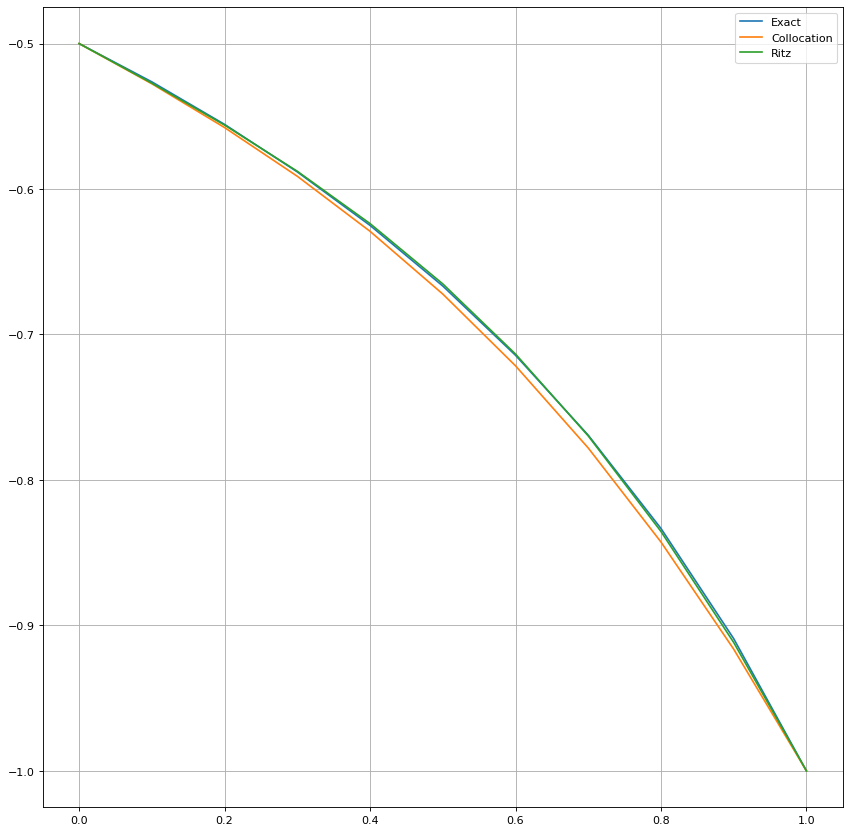

In [34]:
from sympy import symbols, exp, diff, integrate, pi, sin
from sympy.solvers import solve
from numpy import zeros

x = symbols('x')
n = 3

phi = [-0.5 * (x + 1), x ** 2 * (x - 1), x * (x ** 2 - 1)]
x_col = [0.25, 0.5]
c = [-1] + list(symbols(' '.join('c{}'.format(i) for i in range(1, n))))
u = phi[0] + sum([phi[i] * c[i] for i in range(1, n)])

P = 2 / (x - 2)
Q = (x - 2)
F = 1

def collocation_method():
    R = diff(u, x, 2) + P * diff(u, x) + Q * u - F
    A = [R.subs(x, xi) for xi in x_col]
    result = solve(A, c)
    return u.subs(result)

def Ritz_method():
    p = exp(integrate(P, (x, 0, x)))
    q = p * Q
    f = p * F
    dJ = p * diff(u, x) ** 2 - q * u ** 2 + 2 * f * u
    J = integrate(dJ, (x, 0, 1))
    A = [diff(J, c[i]) for i in range(1, n)]
    res = solve(A, c)
    return u.subs(res)

res1 = collocation_method()
res2 = Ritz_method()

h = 0.1
n = 11
rx = [i * h for i in range(n)]
exact = 1 / (x - 2)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(rx, [exact.subs({x: xi}) for xi in rx], label='Exact')
ax.plot(rx, [res1.subs({x: xi}) for xi in rx], label='Collocation')
ax.plot(rx, [res2.subs({x: xi}) for xi in rx], label='Ritz')
ax.legend()
plt.grid()
plt.show()